## Visualizing decompositions of R

This is using Andy's approach of defining
$$
R = R_o + \sum_j q^j R_j
$$

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import utils

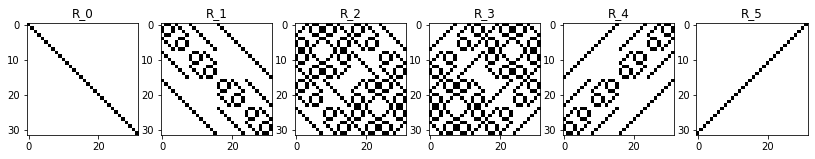

In [61]:
n = 5
d = 1 << n
fig, axes = plt.subplots(1, n+1, figsize=(14, 8))
R = np.zeros((d, d))
for w in range(n+1):
    R_w = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            if utils.distance(i,j) == w:
                R_w[i,j] = 1
    axes[w].imshow(R_w, cmap='binary')
    axes[w].set_title(f"R_{w}")
    R += R_w

In [62]:
arr = np.arange(16).reshape((4,4))

In [63]:
arr[[3,2],[1,3]]

array([13, 11])

In [64]:
lst = [(1,2), (1,3), (4,5)]
list(zip(*lst))

[(1, 1, 4), (2, 3, 5)]

In [105]:

n = 5
j = 2


In [106]:
R = np.zeros((d, d))
R[out] = 1

In [107]:
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

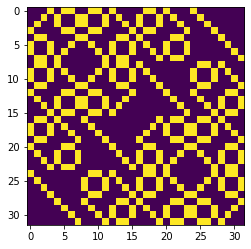

In [108]:
plt.imshow(R)